In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import pandas lib as pd
import pandas as pd
 
# read by default 1st sheet of an excel file
df = pd.read_excel('preprocessed_data_label.xlsx')
 
df.head()

,Unnamed: 0,gender,age,region,watch_options,preferred_cinema,language_options,watch_duration,weekly_duration,top_genres,preferred_screen_size,romantic_preference,horror_preference,monthly_expense,ott_subscription,preferred_time
0,0,Female,18,South India,['Movies'],South Indian,['Dubbed'],1.5,2,"['Comedy', ' Thriller', ' Action/Adventure']","10""- 20""(big tablets, laptops)",Alone,In a group,200,No,"['Afternoon (12pm-4pm)', ' Evening (4pm-8pm)']"
1,1,Male,15,South India,"['Anime', ' Web series']",South Indian,"['Dubbed', ' Subtitle']",1.0,8,"['Romance', ' Comedy', ' Action/Adventure']",">20"" (monitors, tv)",Family,Alone,0,Yes,"['Morning (5am-12pm)', ' Afternoon (12pm-4pm)']"
2,2,Male,19,North India,"['Movies', ' Web series']",South Indian,['Dubbed'],3.5,10,"['Romance', ' Comedy', ' Action/Adventure']","<10"" (phones, small tablets)",Alone,In a group,30,No,['Night (8pm-5am)']
3,3,Male,20,North India,['Anime'],NaN,['Subtitle'],5.0,0,"['Romance', ' Thriller', ' Action/Adventure']","10""- 20""(big tablets, laptops)",Alone,Alone,0,No,['Night (8pm-5am)']
4,4,Female,15,South India,['Web series'],Other cinema,['Subtitle'],13.0,5,"['Romance', ' Thriller', ' Action/Adventure']","10""- 20""(big tablets, laptops)",Alone,In a group,0,No,"['Afternoon (12pm-4pm)', ' Evening (4pm-8pm)',..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             355 non-null    int64  
 1   gender                 355 non-null    object 
 2   age                    355 non-null    int64  
 3   region                 355 non-null    object 
 4   watch_options          355 non-null    object 
 5   preferred_cinema       338 non-null    object 
 6   language_options       355 non-null    object 
 7   watch_duration         355 non-null    float64
 8   weekly_duration        355 non-null    int64  
 9   top_genres             355 non-null    object 
 10  preferred_screen_size  355 non-null    object 
 11  romantic_preference    355 non-null    object 
 12  horror_preference      355 non-null    object 
 13  monthly_expense        355 non-null    int64  
 14  ott_subscription       355 non-null    object 
 15  prefer

### As you can see, only preferred cinema has some null entries, because some people chose Anime only

In [4]:
df.describe()

,Unnamed: 0,age,watch_duration,weekly_duration,monthly_expense
count,355.000000,355.000000,355.000000,355.000000,355.000000
mean,177.000000,19.864789,3.190423,11.512676,259.946479
std,102.623909,2.349125,2.195133,12.698224,447.427853
min,0.000000,15.000000,0.000000,0.000000,0.000000
25%,88.500000,19.000000,2.000000,3.500000,0.000000
50%,177.000000,19.000000,3.000000,7.000000,100.000000
75%,265.500000,20.000000,4.000000,15.000000,400.000000
max,354.000000,38.000000,16.000000,85.000000,3500.000000


In [5]:
# Count the number of Others in gender column
num_of_twos = (df['gender'] == 'Others').sum()
print("Count of Others in gender column:", num_of_twos)

Count of Others in gender column: 1


#### Remove such rows from dataframe as these are outliers
- Information about population parameters can't be drawn from just 2 samples
- 0 - Female, 1- Male, 2- Others

In [6]:
# Remove rows with value 2 in gender column
df = df.drop(df[df['gender'] == 'Others'].index)

# Confirm the rows have been dropped
print("Count of twos in gender column after removing rows with value 2:", (df['gender'] == 'Others').sum())

Count of twos in gender column after removing rows with value 2: 0


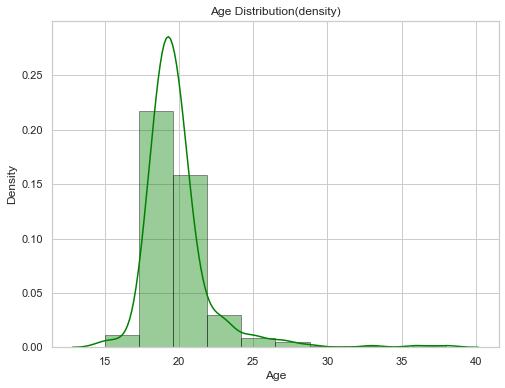

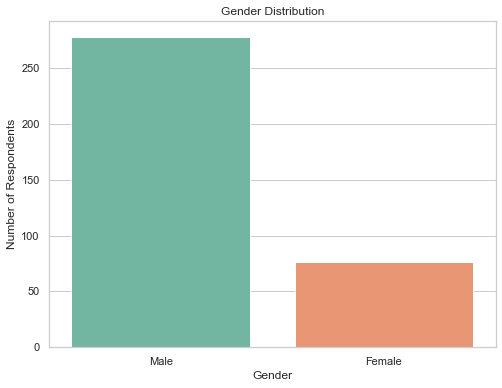

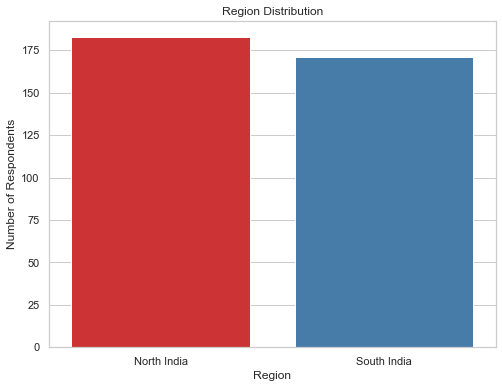

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ax, fig = plt.subplots(figsize=(8,6))
# Create a histogram of ages using matplotlib
# plt.hist(df['age'], bins=10,density=True, color='green', label='Age')
# sns.kdeplot(data=df, x="age", color="green", ax=fig)
sns.distplot(a=df.age, bins=10, color='green',
             hist_kws={"edgecolor": 'black'})
plt.title('Age Distribution(density)')
plt.xlabel('Age')
# plt.ylabel('Count')
# plt.legend()
plt.savefig("age_distribution.jpg", bbox_inches="tight")
plt.show()

ax, fig = plt.subplots(figsize=(8,6))
# Create a bar chart of gender distribution using seaborn
gender_counts = df['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.savefig("gender_distribution.jpg", bbox_inches="tight")
plt.show()

ax, fig = plt.subplots(figsize=(8,6))
# Create a bar chart of gender distribution using seaborn
region_counts = df['region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette='Set1')
plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("Number of Respondents")
plt.savefig("region_distribution.jpg", bbox_inches="tight")
plt.show()



In [8]:
# # Create a bar chart of OTT subscription by gender using seaborn
# sns.set_style("whitegrid")
# sns.countplot(x='gender', hue='ott_subscription', data=df, palette=["red", "blue"])
# plt.title('OTT Subscription by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.legend(title='OTT Subscription', labels=['No', 'Yes'])
# plt.show()

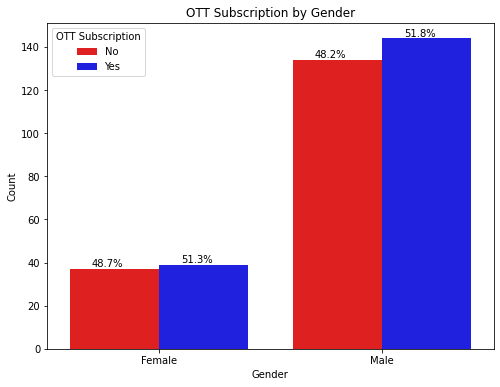

In [9]:
# Create a bar chart of OTT subscription by region using seaborn
ax, fig = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='gender', hue='ott_subscription', data=df, palette=["red", "blue"])
plt.title('OTT Subscription by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='OTT Subscription', labels=['No', 'Yes'])

# Display percentage values on the bars
total_female = len(df[df["gender"]=="Female"])
total_male = len(df[df["gender"]=="Male"])
i = 0
for p in ax.patches:
    if(i % 2 == 0):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_female)
    else:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_male)
    
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
    i += 1

plt.savefig("ott_subscription_by_gender.jpg", bbox_inches="tight")
plt.show()


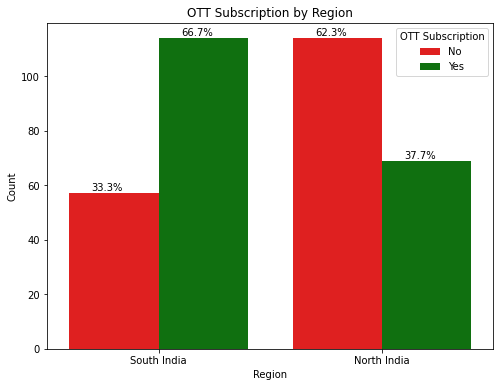

In [10]:
# Create a bar chart of OTT subscription by region using seaborn
ax, fig = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='region', hue='ott_subscription', data=df, palette=["red", "green"])
plt.title('OTT Subscription by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='OTT Subscription', labels=['No', 'Yes'], loc="best")

# Display percentage values on the bars
total_south = len(df[df["region"]=="South India"])
total_north = len(df[df["region"]=="North India"])
i = 0
for p in ax.patches:
    if(i % 2 == 0):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_south)
    else:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_north)
    
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
    i += 1

plt.savefig("ott_subscription_by_region.jpg", bbox_inches="tight")
plt.show()


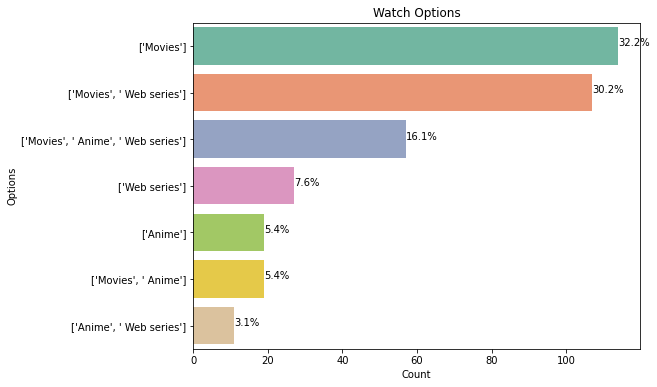

In [11]:
# Explode the watch_options column into individual rows
watch_options = df['watch_options'].explode()

# Create a countplot of the watch_options values using seaborn
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y=watch_options,order=watch_options.value_counts().index, palette='Set2')
plt.title('Watch Options')
plt.xlabel('Count')
plt.ylabel('Options')

# Add percentage text above ach bar
total = len(watch_options)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.savefig("combination_watch_options_bar.jpg", bbox_inches="tight")
plt.show()


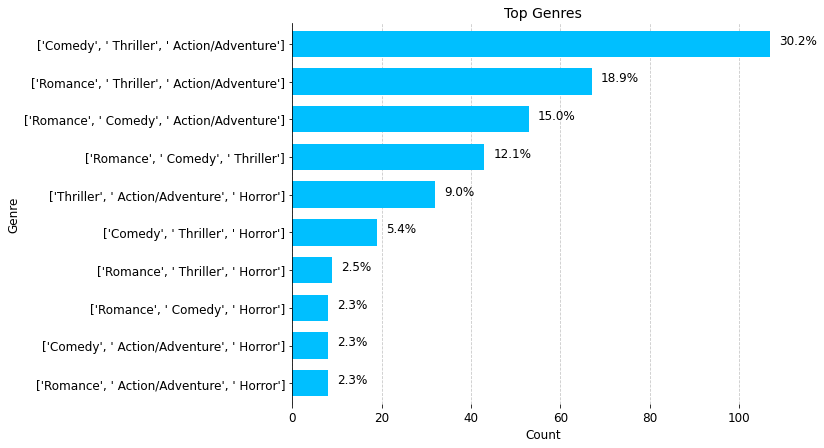

In [12]:
# Count the occurrences of each genre in top_genres
genres_counts = pd.Series(df['top_genres'].explode().value_counts())

# Create a horizontal bar chart of the top 10 genres
top_genres = genres_counts.nlargest(10).sort_values()
fig, ax = plt.subplots(figsize=(9, 7))
ax.barh(top_genres.index, top_genres.values, height=0.7, color='#00BFFF')

# Add labels and titles
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)
ax.set_title('Top Genres', fontsize=14)

# Add grid lines and adjust tick marks
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_axisbelow(True)

# Remove spines and adjust plot margins
for spine in ['top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.margins(y=0.02)

# Add percentages to the bars
for i, v in enumerate(top_genres.values):
    ax.text(v + 2, i, str(round(v / top_genres.sum() * 100, 1)) + '%', fontsize=12)

plt.savefig("combination_top_genres.jpg", bbox_inches="tight")
plt.show()


In [13]:
# Define the list of genres to extract
genres_to_extract = ['Comedy', 'Thriller', 'Action/Adventure', 'Romance', 'Horror']

# Create an empty dataframe with the desired columns
extracted_genres = pd.DataFrame(columns=['gender', 'region'] + genres_to_extract)

# Extract the top genres from the original dataframe and append to extracted_genres
for i, row in df.iterrows():
    genres = row['top_genres']
    extracted_row = {'gender': 'Female' if row['gender'] == 'Female' else 'Male', 'region': 'North' if row['region'] == 'North India' else 'South'}
    extracted_row.update({genre: 1 if genre in genres else 0 for genre in genres_to_extract})
    extracted_genres = extracted_genres.append(extracted_row, ignore_index=True)

# Display the extracted genres dataframe
extracted_genres.head()


,gender,region,Comedy,Thriller,Action/Adventure,Romance,Horror
0,Female,South,1,1,1,0,0
1,Male,South,1,0,1,1,0
2,Male,North,1,0,1,1,0
3,Male,North,0,1,1,1,0
4,Female,South,0,1,1,1,0


#### Proportion=0.8 in Thriller by gender = 'Male' 
- implies that around ~80 % of males picked Thriller in their TOP-3 genres

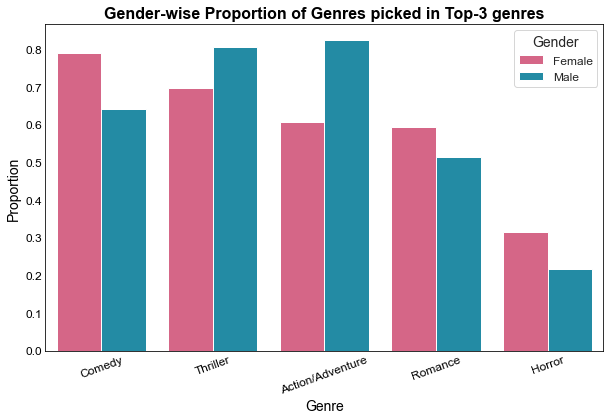

In [14]:
# Define the list of genres
genres = ['Comedy', 'Thriller', 'Action/Adventure', 'Romance', 'Horror']

# Create a melted version of the dataframe for easier plotting
melted_df = pd.melt(extracted_genres, id_vars=['gender', 'region'], value_vars=genres, var_name='genre', value_name='count')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart using seaborn
sns.set(style='whitegrid')
sns.barplot(x='genre', y='count', hue='gender', data=melted_df, ci=None, 
            palette=sns.color_palette(['#E75480', '#0D98BA']), ax=ax)

# Add labels and title
ax.set_title('Gender-wise Proportion of Genres picked in Top-3 genres', fontsize=16, fontweight='bold')
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)

# Customize the tick labels
ax.tick_params(axis='both', labelsize=12, length=0)
ax.set_xticklabels(genres, rotation=20)


# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=12, title='Gender', title_fontsize=14)

plt.savefig("top_3_genres_proportion_by_gender.jpg", format="jpg", bbox_inches="tight")
# Show the plot
plt.show()


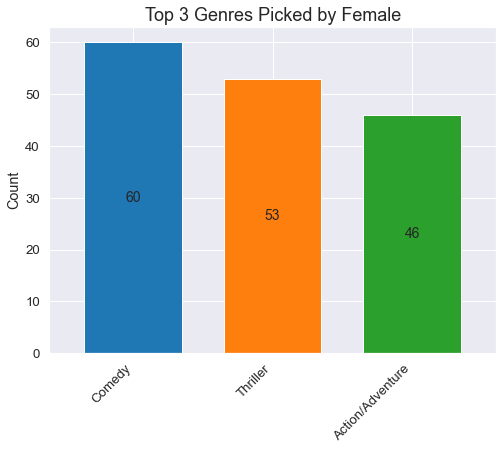

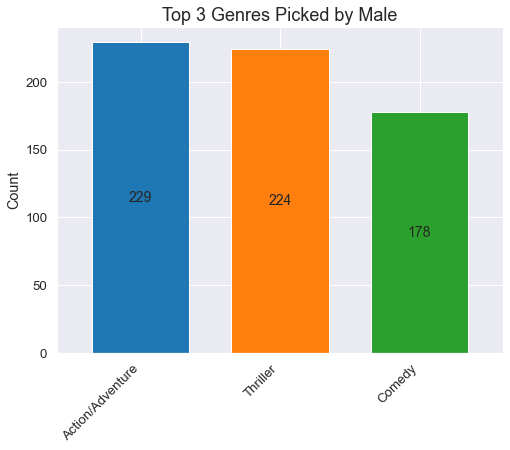

In [15]:
# Group by gender and calculate the sum of each genre for each group
genre_by_gender = extracted_genres.groupby('gender')[genres].sum()

# Get the top 3 genres for each gender separately
top3_by_gender = {}
for gender in genre_by_gender.index:
    top3_by_gender[gender] = genre_by_gender.loc[gender].sort_values(ascending=False).head(3).index

# Get the top 3 genres overall
top3_genres = genre_by_gender.sum().sort_values(ascending=False).head(3).index

# Create a new dataframe with only the top 3 genres for each gender
genre_by_gender_top3 = genre_by_gender[top3_genres]

# Set the plot style
sns.set_style('whitegrid')

# Set the font scale
sns.set(font_scale=1.2)

# Define the colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot segmented bar chart for each gender separately
for gender in genre_by_gender.index:
    # Set the figure size
    plt.figure(figsize=(8, 6))
    top3_genres = genre_by_gender.loc[gender, top3_by_gender[gender]]
    ax = top3_genres.plot(kind='bar', stacked=True, title=gender, color=colors, width=0.7)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#     plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

    # Add labels to the bars
    for patch in ax.containers:
        ax.bar_label(patch, label_type='center', fontsize=14)

    # Add a title to the plot
    plt.title('Top 3 Genres Picked by ' + gender, fontsize=18)
    
    plt.savefig(f"top_3_genres_count_by_{gender}.jpg", bbox_inches="tight")
    # Show the plot
    plt.show()


In [16]:
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(df['weekly_duration'], df['monthly_expense'])

# Print correlation coefficient
print('Correlation coefficient:', corr_coef)

Correlation coefficient: 0.10052688526356014


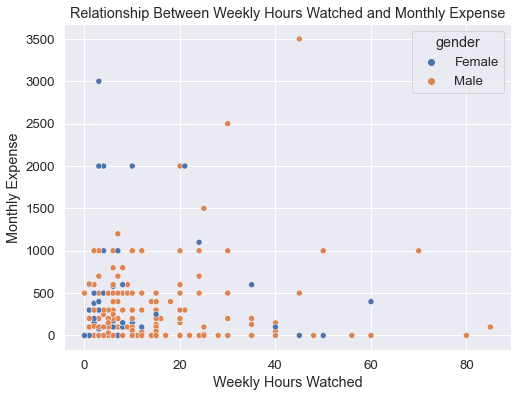

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8,6))
# Create the scatter plot with regression line
sns.scatterplot(x='weekly_duration', y='monthly_expense',hue="gender", data=df)

# Add labels and title
plt.xlabel('Weekly Hours Watched')
plt.ylabel('Monthly Expense')
plt.title('Relationship Between Weekly Hours Watched and Monthly Expense')

plt.savefig("weekly_hours_and_monthly_expense_scatter.jpg", bbox_inches="tight")
# Show the plot
plt.show()


## Removing fake datas

In [18]:
filtered_df = df[(df['watch_duration'] < 15)]
filtered_df

,Unnamed: 0,gender,age,region,watch_options,preferred_cinema,language_options,watch_duration,weekly_duration,top_genres,preferred_screen_size,romantic_preference,horror_preference,monthly_expense,ott_subscription,preferred_time
0,0,Female,18,South India,['Movies'],South Indian,['Dubbed'],1.5,2,"['Comedy', ' Thriller', ' Action/Adventure']","10""- 20""(big tablets, laptops)",Alone,In a group,200,No,"['Afternoon (12pm-4pm)', ' Evening (4pm-8pm)']"
1,1,Male,15,South India,"['Anime', ' Web series']",South Indian,"['Dubbed', ' Subtitle']",1.0,8,"['Romance', ' Comedy', ' Action/Adventure']",">20"" (monitors, tv)",Family,Alone,0,Yes,"['Morning (5am-12pm)', ' Afternoon (12pm-4pm)']"
2,2,Male,19,North India,"['Movies', ' Web series']",South Indian,['Dubbed'],3.5,10,"['Romance', ' Comedy', ' Action/Adventure']","<10"" (phones, small tablets)",Alone,In a group,30,No,['Night (8pm-5am)']
3,3,Male,20,North India,['Anime'],NaN,['Subtitle'],5.0,0,"['Romance', ' Thriller', ' Action/Adventure']","10""- 20""(big tablets, laptops)",Alone,Alone,0,No,['Night (8pm-5am)']
4,4,Female,15,South India,['Web series'],Other cinema,['Subtitle'],13.0,5,"['Romance', ' Thriller', ' Action/Adventure']","10""- 20""(big tablets, laptops)",Alone,In a group,0,No,"['Afternoon (12pm-4pm)', ' Evening (4pm-8pm)',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,350,Male,20,South India,"['Movies', ' Web series']",Hollywood,['Subtitle'],1.5,5,"['Comedy', ' Thriller', ' Action/Adventure']","10""- 20""(big tablets, laptops)",Family,In a group,150,Yes,"['Afternoon (12pm-4pm)', ' Evening (4pm-8pm)']"
351,351,Male,27,North India,"['Movies', ' Web series']",Hollywood,['Subtitle'],0.5,7,"['Comedy', ' Thriller', ' Action/Adventure']","<10"" (phones, small tablets)",Alone,Alone,500,Yes,['Night (8pm-5am)']
352,352,Male,19,South India,['Movies'],South Indian,"['Dubbed', ' Subtitle']",12.0,12,"['Romance', ' Comedy', ' Thriller']","10""- 20""(big tablets, laptops)",Alone,Alone,0,No,"['Afternoon (12pm-4pm)', ' Evening (4pm-8pm)',..."
353,353,Female,22,South India,['Web series'],Hollywood,['Subtitle'],3.0,0,"['Comedy', ' Thriller', ' Action/Adventure']","10""- 20""(big tablets, laptops)",Friends,Alone,0,No,['Night (8pm-5am)']


In [19]:

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(filtered_df['weekly_duration'], filtered_df['watch_duration'])

# Print correlation coefficient
print('Correlation coefficient:', corr_coef)

Correlation coefficient: 0.48086037516416547


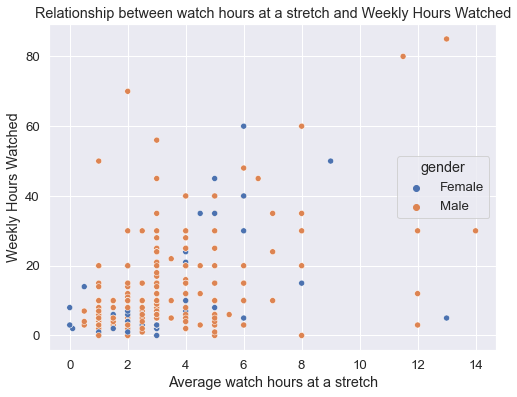

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
# Create the scatter plot with regression line
sns.scatterplot(x='watch_duration', y='weekly_duration',hue="gender", data=filtered_df)

# Add labels and title
plt.xlabel('Average watch hours at a stretch')
plt.ylabel('Weekly Hours Watched')
plt.title('Relationship between watch hours at a stretch and Weekly Hours Watched')

plt.savefig("watch_hours_at_stretch_and_weekly_hours_scatter.jpg", bbox_inches="tight")
# Show the plot
plt.show()

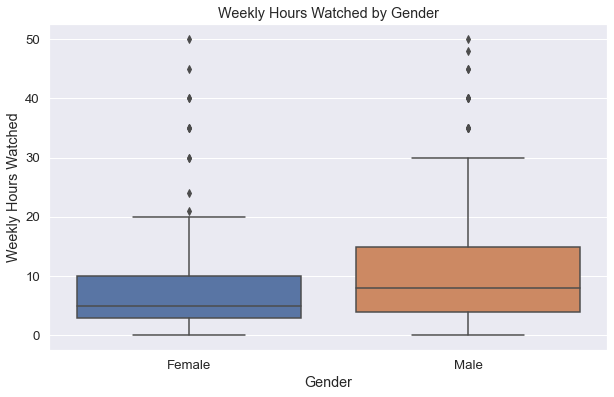

In [21]:
# Remove Fake/Extreme Outliers
df2 = df[(df['weekly_duration'] <= 50)]

# create a figure with subplots
fig, ax = plt.subplots(figsize=(10, 6))

# create a side-by-side box plot using seaborn
sns.boxplot(x='gender', y='weekly_duration', data=df2, ax=ax)

# add labels and title
ax.set_xlabel('Gender')
plt.xticks(ticks=[0,1], labels=["Female", "Male"]) # add relevant labels to the legend
ax.set_ylabel('Weekly Hours Watched')
ax.set_title('Weekly Hours Watched by Gender')

plt.savefig("box_weekly_hours_by_gender.jpg", bbox_inches="tight")
# show the plot
plt.show()


In [22]:
# df['gender'] = df['gender'].replace({0: 'Female', 1: 'Male'})

# Create a contingency table for subscription vs gender
contingency_table = pd.crosstab(df['ott_subscription'], df['gender'])
contingency_table

gender,Female,Male
ott_subscription,,
No,37,134
Yes,39,144


In [23]:
# Create the contingency table
contingency_table = pd.crosstab(df['gender'], df['ott_subscription'])

# Add row and column totals
contingency_table.loc['Total'] = contingency_table.sum()
contingency_table['Total'] = contingency_table.sum(axis=1)

# Calculate marginal proportions
total_subscribers = contingency_table.loc['Total', 'Yes']
total_non_subscribers = contingency_table.loc['Total', 'No']
total_female = contingency_table.loc['Female', 'Total']
total_male = contingency_table.loc['Male', 'Total']

# # contingency_table['% of Subscribers'] = contingency_table[1].apply(lambda x: f"{x / total_subscribers:.2%}")
# # contingency_table['% of Non-Subscribers'] = contingency_table[0].apply(lambda x: f"{x / total_non_subscribers:.2%}")
# contingency_table.loc['Female', '% of Total'] = f"{total_female / (total_female + total_male):.2%}"
# contingency_table.loc['Male', '% of Total'] = f"{total_male / (total_female + total_male):.2%}"


# Rename the columns
contingency_table = contingency_table.rename(columns={0: 'Not Subscribed', 1: 'Subscribed'})

contingency_table


ott_subscription,No,Yes,Total
gender,,,
Female,37,39,76
Male,134,144,278
Total,171,183,354


In [24]:
import numpy as np
# create the contingency table
cont_table = pd.crosstab(df['gender'], df['ott_subscription'])


cont_table.loc['Total(in Numbers)'] = cont_table.sum()
cont_table['Total'] = cont_table.sum(axis=1)

# calculate the percentages
total_women = cont_table.loc['Female', 'Total']
total_men = cont_table.loc['Male', 'Total']
cont_table.loc['Female', :] = np.round((cont_table.loc['Female', :] / total_women) * 100, 2)
cont_table.loc['Male', :] = np.round((cont_table.loc['Male', :] / total_men) * 100, 2)

cont_table = cont_table.rename(columns={"No": '% Not Subscribed', "Yes": '% Subscribed', "Total" : "Total %"})

# display the contingency table with percentages
cont_table

ott_subscription,% Not Subscribed,% Subscribed,Total %
gender,,,
Female,48.68,51.32,100
Male,48.20,51.80,100
Total(in Numbers),171.00,183.00,354


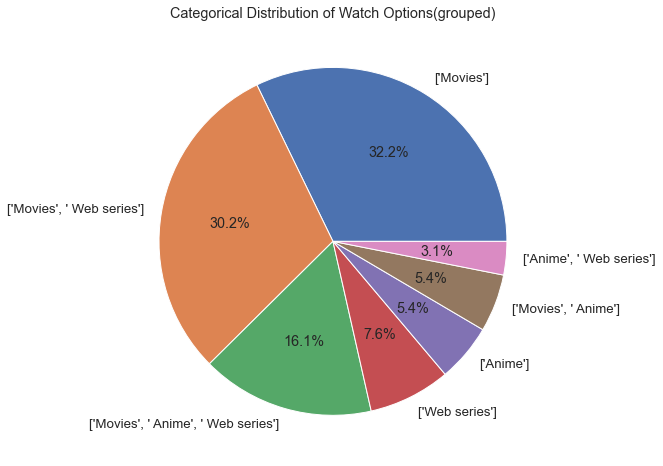

In [25]:
# Count the frequency of each category in the watch_options column
watch_options_counts = df['watch_options'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,8)) # set figure size
plt.pie(watch_options_counts.values, labels=watch_options_counts.index, autopct='%1.1f%%')
plt.title('Categorical Distribution of Watch Options(grouped)')
plt.savefig("pie_watch_options_combination.jpg", bbox_inches="tight")
plt.show()

In [26]:
# Define the list of genres to extract
to_extract = ['Movies', 'Anime', 'Web series']

# Create an empty dataframe with the desired columns
extracted_df = pd.DataFrame(columns=['gender', 'region'] + to_extract)

# Extract the top genres from the original dataframe and append to extracted_genres
for i, row in df.iterrows():
    genres = row['watch_options']
    extracted_row = {'gender': 'Female' if row['gender'] == "Female" else 'Male', 'region': 'North' if row['region'] == "North India" else 'South'}
    extracted_row.update({genre: 1 if genre in genres else 0 for genre in to_extract})
    extracted_df = extracted_df.append(extracted_row, ignore_index=True)

# Display the extracted genres dataframe
extracted_df.head()

,gender,region,Movies,Anime,Web series
0,Female,South,1,0,0
1,Male,South,0,1,1
2,Male,North,1,0,1
3,Male,North,0,1,0
4,Female,South,0,0,1


In [27]:
sums = extracted_df[['Movies', 'Anime', 'Web series']].sum()
sums

Movies        297
Anime         106
Web series    202
dtype: object

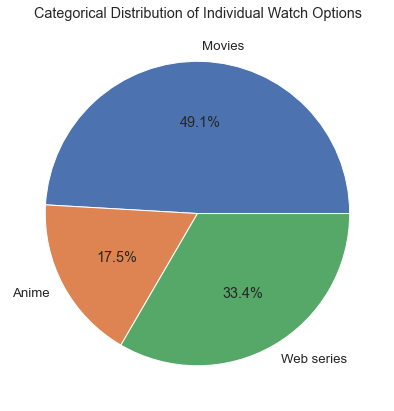

In [28]:
# Plot a pie chart showing their distribution
plt.figure(figsize=(7,7)) # set figure size
plt.pie(sums, labels=sums.index, autopct='%1.1f%%')
plt.title('Categorical Distribution of Individual Watch Options')
plt.savefig("pie_watch_options_individual.jpg", bbox_inches="tight")
plt.show()

## Further Plots

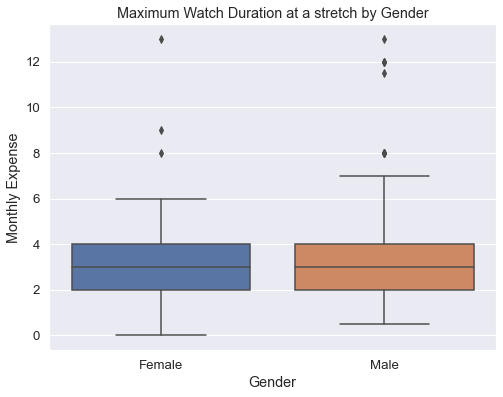

In [29]:
df2 = df[df["watch_duration"] < 14]

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='gender', y='watch_duration', data=df2)
plt.title('Maximum Watch Duration at a stretch by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Expense')
plt.savefig("box_max_watch_hours_at_stretch_by_gender.jpg", bbox_inches="tight")
plt.show()


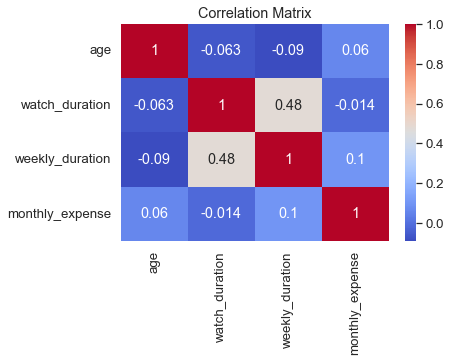

In [30]:
df2 = df.drop('Unnamed: 0', axis=1)
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [31]:
df.head()

,Unnamed: 0,gender,age,region,watch_options,preferred_cinema,language_options,watch_duration,weekly_duration,top_genres,preferred_screen_size,romantic_preference,horror_preference,monthly_expense,ott_subscription,preferred_time
0,0,Female,18,South India,['Movies'],South Indian,['Dubbed'],1.5,2,"['Comedy', ' Thriller', ' Action/Adventure']","10""- 20""(big tablets, laptops)",Alone,In a group,200,No,"['Afternoon (12pm-4pm)', ' Evening (4pm-8pm)']"
1,1,Male,15,South India,"['Anime', ' Web series']",South Indian,"['Dubbed', ' Subtitle']",1.0,8,"['Romance', ' Comedy', ' Action/Adventure']",">20"" (monitors, tv)",Family,Alone,0,Yes,"['Morning (5am-12pm)', ' Afternoon (12pm-4pm)']"
2,2,Male,19,North India,"['Movies', ' Web series']",South Indian,['Dubbed'],3.5,10,"['Romance', ' Comedy', ' Action/Adventure']","<10"" (phones, small tablets)",Alone,In a group,30,No,['Night (8pm-5am)']
3,3,Male,20,North India,['Anime'],NaN,['Subtitle'],5.0,0,"['Romance', ' Thriller', ' Action/Adventure']","10""- 20""(big tablets, laptops)",Alone,Alone,0,No,['Night (8pm-5am)']
4,4,Female,15,South India,['Web series'],Other cinema,['Subtitle'],13.0,5,"['Romance', ' Thriller', ' Action/Adventure']","10""- 20""(big tablets, laptops)",Alone,In a group,0,No,"['Afternoon (12pm-4pm)', ' Evening (4pm-8pm)',..."


In [32]:
df3 = df.explode('preferred_cinema')
grouped_df = df3.groupby(['region', 'preferred_cinema']).size().reset_index(name='count')
grouped_df

,region,preferred_cinema,count
0,North India,Bollywood,64
1,North India,Hollywood,76
2,North India,Other cinema,12
3,North India,South Indian,22
4,South India,Bollywood,8
5,South India,Hollywood,56
6,South India,Other cinema,7
7,South India,South Indian,92


In [33]:
# Calculate the total count for each region
region_count = grouped_df.groupby('region')['count'].transform('sum')

# Calculate the percentage distribution of each 'preferred_cinema' within each region
grouped_df['percentage'] = (grouped_df['count'] / region_count) * 100


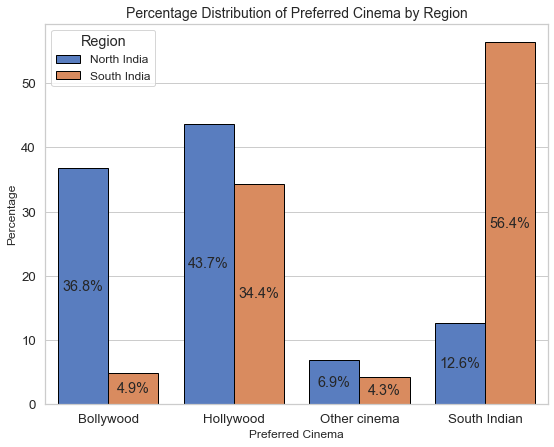

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(9, 7))

# Create stacked bar chart
sns.barplot(x='preferred_cinema', y='percentage', hue='region', data=grouped_df, palette='muted', edgecolor='black', linewidth=1)

# Add percentage labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2,
                   '{:.1f}%'.format(height), ha='center', va='center')

# Set labels and titles
plt.xlabel('Preferred Cinema', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage Distribution of Preferred Cinema by Region', fontsize=14)
plt.legend(title='Region', fontsize=12)
plt.savefig("bar_%_dist_of_preferred_wood_by_region.jpg", bbox_inches="tight")
plt.show()


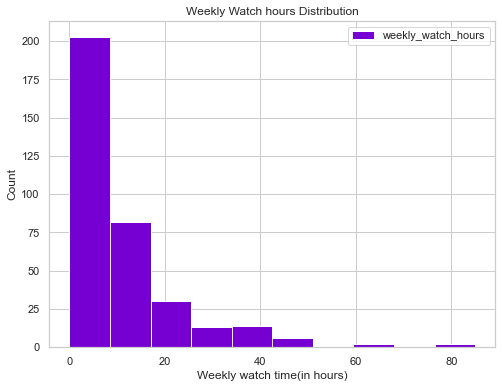

In [59]:
ax, fig = plt.subplots(figsize=(8,6))
# Create a histogram of ages using matplotlib
plt.hist(df['weekly_duration'], bins=10, color='#7500D1', label='weekly_watch_hours')
plt.title('Weekly Watch hours Distribution')
plt.xlabel('Weekly watch time(in hours)')
plt.ylabel('Count')
plt.legend()
plt.savefig("weekly_duration_distribution.jpg", bbox_inches="tight")
plt.show()

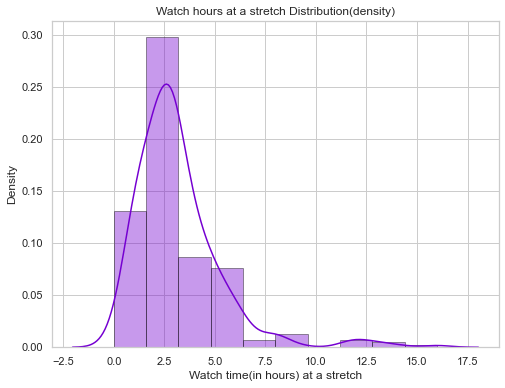

In [61]:
ax, fig = plt.subplots(figsize=(8,6))
# Create a histogram of ages using matplotlib
# plt.hist(df['watch_duration'], bins=10, color='#7500D1', label='watch hours at a stretch')
sns.distplot(a=df.watch_duration, bins=10, color='#7500D1',
             hist_kws={"edgecolor": 'black'})
plt.title('Watch hours at a stretch Distribution(density)')
plt.xlabel('Watch time(in hours) at a stretch')
# plt.ylabel('Count')
# plt.legend()
plt.savefig("watch_duration_distribution.jpg", bbox_inches="tight")
plt.show()

In [37]:
# Prefered time
# Define the list of genres to extract
times_to_extract = [' Evening (4pm-8pm)', 'Afternoon (12pm-4pm)', 'Morning (5am-12pm)', 'Night (8pm-5am)']

# Create an empty dataframe with the desired columns
extracted_times = pd.DataFrame(columns=['gender', 'region'] + times_to_extract)

# Extract the top genres from the original dataframe and append to extracted_genres
for i, row in df.iterrows():
    times = row['preferred_time']
    extracted_row = {'gender': 'Female' if row['gender'] == 'Female' else 'Male', 'region': 'North' if row['region'] == 'North India' else 'South'}
    extracted_row.update({time: 1 if time in times else 0 for time in times_to_extract})
    extracted_times = extracted_times.append(extracted_row, ignore_index=True)

# Display the extracted genres dataframe
extracted_times.head()


,gender,region,Evening (4pm-8pm),Afternoon (12pm-4pm),Morning (5am-12pm),Night (8pm-5am)
0,Female,South,1,1,0,0
1,Male,South,0,1,1,0
2,Male,North,0,0,0,1
3,Male,North,0,0,0,1
4,Female,South,1,1,0,1


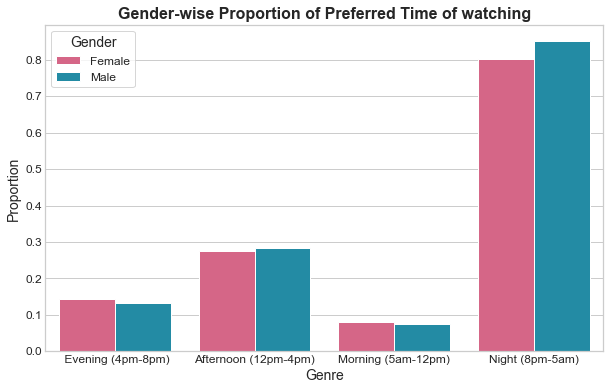

In [38]:
# Create a melted version of the dataframe for easier plotting
melted_df = pd.melt(extracted_times, id_vars=['gender', 'region'], value_vars=times_to_extract, var_name='genre', value_name='count')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart using seaborn
sns.set(style='whitegrid')
sns.barplot(x='genre', y='count', hue='gender', data=melted_df, ci=None, 
            palette=sns.color_palette(['#E75480', '#0D98BA']), ax=ax)

# Add labels and title
ax.set_title('Gender-wise Proportion of Preferred Time of watching', fontsize=16, fontweight='bold')
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)

# Customize the tick labels
ax.tick_params(axis='both', labelsize=12, length=0)
ax.set_xticklabels(times_to_extract, rotation=0)


# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=12, title='Gender', title_fontsize=14)

plt.savefig("top_preferred_watch_time_proportion_by_gender.jpg", bbox_inches="tight")
# Show the plot
plt.show()


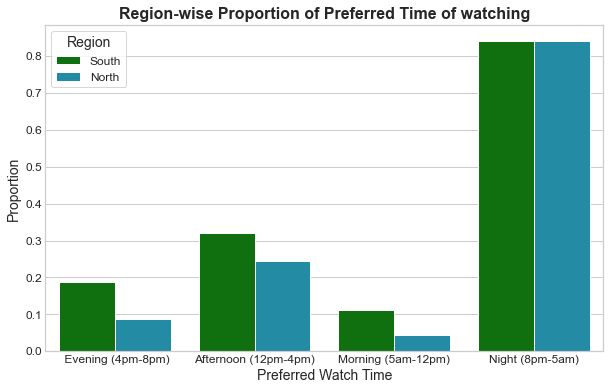

In [39]:
# Create a melted version of the dataframe for easier plotting
melted_df = pd.melt(extracted_times, id_vars=['gender', 'region'], value_vars=times_to_extract, var_name='genre', value_name='count')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart using seaborn
sns.set(style='whitegrid')
sns.barplot(x='genre', y='count', hue='region', data=melted_df, ci=None, 
            palette=sns.color_palette(['green', '#0D98BA']), ax=ax)

# Add labels and title
ax.set_title('Region-wise Proportion of Preferred Time of watching', fontsize=16, fontweight='bold')
ax.set_xlabel('Preferred Watch Time', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)

# Customize the tick labels
ax.tick_params(axis='both', labelsize=12, length=0)
ax.set_xticklabels(times_to_extract, rotation=0)


# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=12, title='Region', title_fontsize=14)

plt.savefig("top_preferred_watch_time_proportion_by_region.jpg", bbox_inches="tight")
# Show the plot
plt.show()
